In [1]:
import numpy as np
from scipy import misc
from skimage import measure
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = misc.imread("objetos1.png", mode="L")

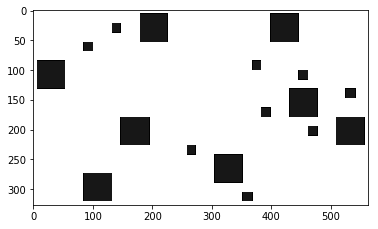

In [3]:
plt.imshow(img, cmap="gray")
plt.show()

### Gerar contornos e desenhar

In [4]:
contours = measure.find_contours(img, 0.8)

In [5]:
nova_img = np.ones(img.shape) * 255

In [6]:
label_obj = measure.label(img, neighbors=4, background=None)

In [7]:
propriedades = measure.regionprops(label_obj)

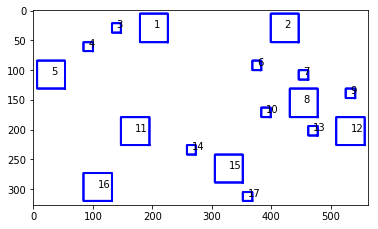

In [8]:
fig, ax = plt.subplots()
ax.imshow(nova_img, cmap=plt.cm.gray, vmin=0, vmax=255)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], color="b",linewidth=2)

ax.axis('image')
for i in range(1,len(propriedades)): 
    plt.text(propriedades[i].centroid[1], propriedades[i].centroid[0], "%d" % i)
plt.show()

In [9]:
for i in range(1,len(propriedades)):
    print("%d area: %d perimetro: %d" % (i,propriedades[i].area,propriedades[i].perimeter))

1 area: 2162 perimetro: 182
2 area: 2162 perimetro: 182
3 area: 210 perimetro: 54
4 area: 210 perimetro: 54
5 area: 2116 perimetro: 180
6 area: 210 perimetro: 54
7 area: 225 perimetro: 56
8 area: 2162 perimetro: 182
9 area: 225 perimetro: 56
10 area: 225 perimetro: 56
11 area: 2162 perimetro: 182
12 area: 2162 perimetro: 182
13 area: 225 perimetro: 56
14 area: 210 perimetro: 54
15 area: 2116 perimetro: 180
16 area: 2162 perimetro: 182
17 area: 210 perimetro: 54


In [10]:
grande = 0
pequena = 0
media = 0
for i in range(1,len(propriedades)):
    if (propriedades[i].area >= 3000):
        grande +=1
    elif (propriedades[i].area >= 1500):
        media +=1
    else:
        pequena +=1

In [11]:
area = []
for i in range(1,len(propriedades)):
    area.append(propriedades[i].area)

In [12]:
print(grande)
print(media)
print(pequena)

0
8
9


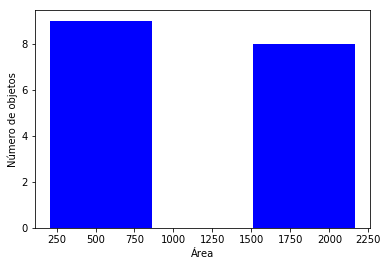

In [13]:
plt.hist(area,bins=3, facecolor='b', normed=False)
plt.autoscale(enable=True, axis='y', tight=False)
plt.xlabel("Área")
plt.ylabel("Número de objetos")
plt.show()

### Gerando os dados dos objetos utilizando scipy

In [14]:
from scipy import ndimage

In [15]:
label_im, nb_labels = ndimage.label(img)

In [16]:
propriedades2 = measure.regionprops(label_im)

In [17]:
for i in range(1,len(propriedades2)):
    print("%d area: %d perimetro: %d" % (i,propriedades2[i].area,propriedades2[i].perimeter))

1 area: 2162 perimetro: 182
2 area: 2162 perimetro: 182
3 area: 210 perimetro: 54
4 area: 210 perimetro: 54
5 area: 2116 perimetro: 180
6 area: 210 perimetro: 54
7 area: 225 perimetro: 56
8 area: 2162 perimetro: 182
9 area: 225 perimetro: 56
10 area: 225 perimetro: 56
11 area: 2162 perimetro: 182
12 area: 2162 perimetro: 182
13 area: 225 perimetro: 56
14 area: 210 perimetro: 54
15 area: 2116 perimetro: 180
16 area: 2162 perimetro: 182
17 area: 210 perimetro: 54


### Gerando os dados utilizando threshold_mean binarizando a imagem

In [6]:
from skimage.filters import threshold_mean